In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('australian.csv')
data.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','Y']
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [2]:
print('null values in dataset is: \n', data.isnull().sum())
#We can use isnull() method to check whether a cell 
#contains a numeric value ( False ) or if data is missing ( True )
#and used with the sum() method which returns the number of missing values per column

null values in dataset is: 
 X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64


In [3]:
X = data.drop(['Y'], axis=1).values
y = data['Y'].values
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0
1,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
2,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0
3,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0
4,0.0,15.83,0.585,2.0,8.0,8.0,1.500,1.0,1.0,2.0,0.0,2.0,100.0,1.0


In [51]:
#X = data.iloc[:, :-1].values
#Y = data.iloc[:, -1].values

#
# applying One Hot Encoding on columns: 4, 5, 6, 12

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
        transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto',sparse=False),[4, 5, 6, 12])],
        remainder = 'passthrough') #making 

X = ct.fit_transform(X)

# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X.shape


(689, 343)

In [57]:
# d. min-max normalization to bring all features in similar range
import matplotlib.pyplot as plt
# (value - min) / (max -min)
# copy the data
df_min_max_scaled = X.copy()
  
# apply normalization techniques    
for column in range(0,13):
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    
# view normalized data
df_min_max_scaled.shape

(689, 343)

In [58]:
from sklearn.model_selection import train_test_split

X = df_min_max_scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

#Apply SVM algo on X dataset to get appropriate model

from sklearn import svm
clf = svm.SVC(kernel='linear', C=0.01) #clf is the model ; C is regularization parameter; Linear kernel used for linearly separable dataset;
# As values of C parameter increases, misclassification will be less . Thus it leads to overfitting as the margin becomes more harder/smaller
# High values of gamma leads to overfitting as it correctly identifies the support vectors and accordingly a harder margin. Its related to Gaussian kernel

clf.fit(X_train, y_train)    #Fit the model

y_pred = clf.predict(X_test)
print(clf.intercept_, clf.coef_)  #the theta parameters t0 given by intercept_ , the remaining parameters t1,t2 given by array coef_ . 

theta_0=clf.intercept_
theta = clf.coef_


# Add theta0 with theta array to form a single vector
thetas = np.insert(theta[0],0,theta_0)    #theta_0 added at the front of the array. Index 0

print('thetas ',thetas)

[-0.17480883] [[ 1.54519724e-02 -1.10735984e-02 -1.10735984e-02  1.54519724e-02
   3.59697452e-02 -3.15913712e-02  8.10659930e-04  3.56771410e-03
   1.76234387e-02 -1.32450647e-02  2.42170305e-02 -1.98386564e-02
   3.59697452e-02 -1.01395390e-01 -1.78555137e-02 -2.09456221e-02
  -6.70969491e-02  3.47796673e-02  2.38146962e-02  4.89375791e-02
   3.93922516e-02  9.66309145e-02 -5.78033591e-02  1.46290328e-02
   6.86736148e-02  6.13298177e-03 -2.88221045e-02  2.40103159e-02
   4.48805089e-02 -3.63324152e-02  6.36630478e-04  2.06867366e-02
   6.29865135e-03 -3.80143327e-02 -3.34772986e-02 -1.57496116e-02
  -2.22452679e-02 -8.65296750e-03 -2.68524980e-02 -8.29274933e-02
  -4.25991360e-04 -2.72158476e-02  2.76747641e-03 -7.52914189e-02
   5.72618815e-03 -6.98272086e-02  3.00760672e-03  3.61087641e-03
   5.34613592e-03  1.42325781e-02  2.76747641e-03 -3.55868375e-02
   5.86433525e-02 -1.11789127e-02 -2.32230345e-02 -4.57880270e-03
   4.91516961e-03  5.15523058e-02 -8.06924992e-02  3.00760672e

In [59]:
X_test[:,12]


array([-0.25153848, -0.25153848, -0.25153848, -0.25153848, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848,  3.97553494,
        0.15273157, -0.25153848, -0.25153848, -0.25153848,  3.97553494,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848,  3.97553494,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848, -0.25153848,
        3.97553494, -0.25153848,  0.04331056,  3.97553494, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848,  3.97553494,
       -0.25153848, -0.25153848, -0.25153848,  0.03462565, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848,  3.97553494, -0.25153848,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848,  3.97553494,
       -0.25153848, -0.25153848, -0.25153848, -0.25153848, -0.25

In [60]:
y_pred.shape

(138,)

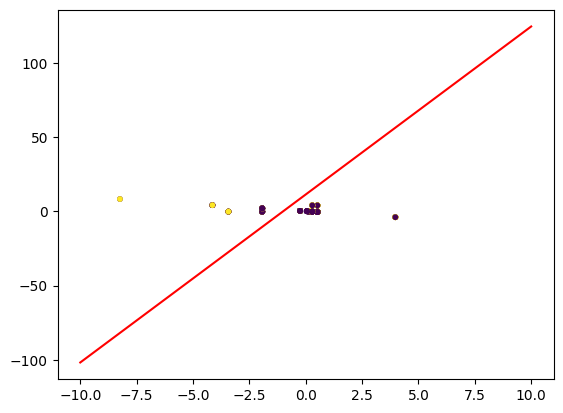

In [63]:
#Form points to draw Decision boundary 

p1 = np.linspace(-10, 10)    # generating points for X-axis
p2 = -(thetas[0] / thetas[1]) * p1 - thetas[0] / thetas[1]  # getting corresponding Y-axis points

#Plot data and decision boundary

target= y_pred


fig= plt.figure()
ax=fig.add_subplot(111)     #Inorder to have multiple plots in the same figure
plt.scatter(X_test[:,6],X_test[:,12],c = target,s=10)
plt.scatter(X_test[:,2],X_test[:,3],c = target,s=10)
plt.scatter(X_test[:,4],X_test[:,5],c = target,s=10)
plt.scatter(X_test[:,6],X_test[:,7],c = target,s=10)
plt.scatter(X_test[:,8],X_test[:,9],c = target,s=10)
plt.scatter(X_test[:,10],X_test[:,12],c = target,s=10)

# Plotting a red hyperplane
plt.plot(p1,p2, c='r');

# ax.set_xlim([xmin,xmax])
# ax.set_ylim([x_2min,x_2max])

plt.show()

In [65]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.8239935064935067

Standard Deviation within the accuracies:  0.040502631882483785

Accuracy:  0.8623188405797102


In [67]:
#Poly kernel 
clf = svm.SVC(kernel='poly', C=0.01)

clf.fit(X_train, y_train)    #Fit the model

y_pred = clf.predict(X_test)


In [68]:
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.539025974025974

Standard Deviation within the accuracies:  0.008205747320478244

Accuracy:  0.6159420289855072


In [72]:
#rbf kernel 
clf = svm.SVC(kernel='rbf', C=0.01)
clf.fit(X_train, y_train)    #Fit the model

y_pred = clf.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.539025974025974

Standard Deviation within the accuracies:  0.008205747320478244

Accuracy:  0.6159420289855072
